SVM对数据点$x_i$的预测值为：  
$$
f(x_i) = (\sum_{i=1}^{M}a_iy_i) \cdot K<x, x_i> + b \tag{1}
$$
记$E_i$为SVM预测值与真实值的误差：  
$$
E_i = f(x_i) - y_i \tag{2}
$$
公式（2）对应的函数为：
```python
def E(dataMat, labelMat, alphas, i, b)
```

目标函数：

$$
W(a) = \sum_{i=1}^{M}a - \frac{1}{2}\sum_{i,j=1}^{M}y_iy_ja_ia_jK_{i,j} \tag{3} \\
$$
约束条件：

$$
0 \le a \le C \tag {4}
$$
$$
\sum_{i=1}^{M}a_iy_i = 0 \tag {5} 
$$

假设现在要更新的是$a_1$和$a_2$,即代码中的I和J，其它alpha都当作常数  
根据约束条件$\sum_{i=1}^M a_iy_i =0$可以得到a_1和a_2的关系：  
$$
a_1y_1 + a_2y_2 = - \sum_{i=3}^{M}a_iy_i = \zeta \tag{6}
$$
公式（6）左边两边同时乘以$y_1$，得：  
$$
a_1 = \zeta y_1 - a_2y_2y_1 \tag{7}
$$
其中$\zeta$代表一个常数。  
目标函数（3）中也把变量$a_1$、$a_2$和常量其它$a$分开，则写成  
$$
W(a_1, a_2) = a_1 + a_2 - \frac{1}{2}K_{1,1}y_1^2a_1^2 - \frac{1}{2}K_{2,2}y_2^2a_2^2 - K_{1,2}y_1y_2a_1a_2 - y_1a_1\sum_{i=3}^{M}a_iy_iK_{i,1} - y_2a_2\sum_{i=3}^{M}a_iy_iK_{i,2} + C\tag {8}
$$
其中$C$是一个与$a_1$、$a_2$无关的常数  
把公式（7）代码公式（8）中，同时为了简单公式（8）的写法，令：  
$$
v_1 = \sum_{i=3}^{M}a_iy_iK_{i,1} \\
v_2 = \sum_{i=3}^{M}a_iy_iK_{i,2} \tag {9}
$$
最终公式（8）变成了公式（10）  
$$
W(a_2) = - \frac{1}{2}K_{1,1}(\zeta - a_2y_2)^2 - \frac{1}{2}K_{2,2}a_2^2 - y_2(\zeta-a_2y_2)a_2K_{1,2} - v_1(\zeta-a_2y_2)-v_2y_2a_2+a_1+a_2+C \tag{10}
$$
公式（10）$W(a_2)$在其一阶层数为0的位置取得最大值点。因此$\frac{\partial W(a_2)}{\partial a_2}=0$得到的$a_2$为新的$a_2$值
$$
\frac{\partial W(a_2)}{\partial a_2} = -(K_{1,1}+K_{2,2}-2K{1,2})a_2^{new} + K{1,1}\zeta y_2 - K_{1,2}\zeta y_2 + v_1y_2 - v_2y_2 - y_1y_2 +y_2^2 = 0 \tag{11}
$$
公式（11）已经能解出a_2^{new}了，但这样的计算很不方便，可以把公式（11）中不包含$a_2^{new}$的项用$a_2^{old}$来表达。具体方法是将公式(1)(2)(7)代入公式（11）中，并令$\eta = - K_{1,1} - K_{2,2} + 2K_{1,2}$
公式$\eta$对应的代码为：  
```python
def calc_eta(I, J)
```

得到最终的一阶导数表达式   

$$
\frac{\partial W(a_2)}{\partial a_2} = \eta a_2^{new} - \eta a_2^{old} + y_2(E_1 - E_2) = 0 \tag{12}
$$
得到  

$$
a_2^{new} = a_2^{old} - \frac{y_2(E_1-E_2)}{\eta} \tag{13}
$$
公式（13）对应的代码为：
```python
def update_alpha_j(I, J, C)
```

公式（13）计算出来的$a_2^{new}$没有考虑边界，根据公式（6）和（4）可以计算出$a_2^{new}$的边界如图：
![](https://img-blog.csdn.net/20180727105736824?watermark/2/text/aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTE3MzQxNDQ=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70)
当$y_1 \neq y_2$时，
$$\begin{cases}
L = max(0, a_2^{old} - a_1^{old}) \\
H = min(C, C + a_2^{old} - a_1^{old})\\
\end{cases} \tag {14}
$$
当$y_1 = y_2$时，
$$\begin{cases}
L = max(0, a_2^{old} + a_1^{old} - C) \\
H = min(C, a_2^{old} + a_1^{old}) \\
\end{cases} \tag {15}
$$
公式（14）（15）对应的代码为：
```python
def calcLH(C, I, J)
```

更新完$a_2$以后，根据公式2计算出新的$a_1$  
由于$a$的更新不会影响$\zeta y_1$，得出：

$$
a_1^{new} = a_1^{old} + y_1y_2(a_2^{old} - a_2^{new}) \tag {16}
$$
公式（14）对应的代码为
```python
def update_alpha_i(I, J)
```

更新完一对$a_1$、$a_2$之后，b也要相应的更新  
当 $a_1^{new}$不在边界上，即 $0<a_1^{new}≤C$ ，根据KTT条件可知相应的数据点为支撑向量  
当b_1和b_2都有效的时候它们是相等的，即$b^{new} = b_1^{new} = b_2^{new}$  
但当$a_1$、$a_2$都在边界上且$L \neq H$时，$b_1$、$b_2$之间的值就是和KTT条件一致的阈值。  
SMO选择它们的中点作为新的阈值，即  
$$
b^{new} = \frac{b_1^{new} + b_2^{new}}{2}
$$
更新b对应的代码为：
```python
def update_b(I, J, C, b)
```

当$a_1^{new}$不在边界上，即$0 \lt a_1^{new} \le C$，根据KTT条件可知相应的数据点为支撑向量  
判断是否在边界上对应的代码为：
```python
def isInBound(I, C)
```

如果$a_1^{new}$不在边界上，可知相应的数据点为支撑向量，满足$y_1(w^T+b) = 1$，两边同时乘以$y_1$，得到：  

$$
\sum_{i=1}^{M}a_iy_iK_{i,1}+b=y_1  \tag {17}
$$
进而得到$b_1$的值：  

$$
b_1^{new} = y_1 - \sum_{i=3}^{M}a_iy_iK_{i,1} - a_1^{new}y_1K_{1,1} - a_2^{new}y_2K_{2,1} \tag {18}
$$
其中前两项可以写成：  

$$
y_1 - \sum_{i=3}^{M}a_iy_iK_{i,1} = -E_1 + a_1^{old}y_1K_{1,1} + a_2^{old}y_1K_{2,1} + b_old \tag {19}
$$
合并公式（18）、（19）可推出：

$$
b_1^{new} = -E_1 - y_1K_{1,1}(a_1^{new}-a_1^{old}) - y_2K_{2,1}(a_2^{new}-a_2^{old}) + b^{old} \tag {20}
$$
公式（18）对应的代码为
```python
def calc_b_gap(I, J, target)
```

In [3]:
%%time
b,alphas = svmMLiA.smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

iter: 0, i: 0, pairs changed 1
error not big enough
L==H
iter: 0, i: 3, pairs changed 2
L==H
L==H
L==H
L==H
L==H
error not big enough
L==H
L==H
L==H
error not big enough
L==H
L==H
error not big enough
error not big enough
iter: 0, i: 18, pairs changed 3
error not big enough
L==H
L==H
error not big enough
L==H
J not moving enough
error not big enough
error not big enough
L==H
error not big enough
L==H
L==H
error not big enough
error not big enough
error not big enough
error not big enough
L==H
iter: 0, i: 36, pairs changed 4
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
L==H
iter: 0, i: 46, pairs changed 5
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
L==H
J not moving enough
iter: 0, i: 54, pairs changed 6
L==H
J not moving enough
error not big enough
error not big enough
error not big enough
J not moving eno

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
J not moving enough
J not moving enough
error not big enough
error not big enough
iteration number: 0
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
iter: 0, i: 5, pairs changed 1
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 1
J not moving enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
iter: 0, i: 54, pairs changed 2
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
err

error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 3
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 5
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enoug

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 20
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big eno

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 13
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big 

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 6
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enoug

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 2
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
error not big enough
error not big enou

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 2
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big eno

error not big enough
error not big enough
error not big enough
iteration number: 0
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enou

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 3
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enou

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
iteration number: 17
error not big enough
error not big enough
error not big enough
error not big

error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big 

error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
J not moving enough
iter: 4, i: 55, pairs changed 1
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error

J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big en

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
J not moving enough
error not big eno

error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
J not moving enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big enough
error not big e

In [4]:
b

-3.806906484028184

In [5]:
alphas[alphas>0]  

matrix([[3.46944695e-18, 1.07535857e-01, 3.46944695e-18, 1.95766932e-01,
         5.18971601e-02, 4.63597790e-02, 3.08840171e-01]])

In [6]:
# 打印支撑向量
for i in range(100):
    if alphas[i]>1e-3: print( dataArr[i],labelArr[i])

[4.658191, 3.507396] -1.0
[3.457096, -0.082216] -1.0
[2.893743, -1.643468] -1.0
[5.286862, -2.358286] 1.0
[6.080573, 0.418886] 1.0


[ 0.79513827 -0.25574513] -3.806906484028184


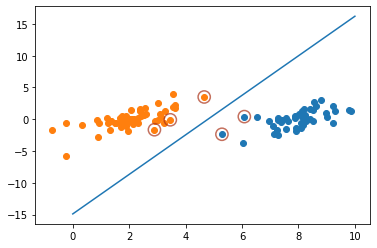

In [7]:
svmMLiA.showSimpleSMO(dataArr, labelArr, alphas, b)

In [8]:
dataArr,labelArr = svmMLiA.loadDataSet('testSet.txt')
oS = svmMLiA.smoP(dataArr, labelArr, 0.6, 0.001, 40)

iter: 1 i:99, pairs changed 6
iter: 2 i:96, pairs changed 1
iter: 3 i:96, pairs changed 1
iter: 4 i:96, pairs changed 3
iter: 5 i:96, pairs changed 2
iter: 6 i:76, pairs changed 2
iter: 7 i:76, pairs changed 3
iter: 8 i:95, pairs changed 0
iter: 9 i:99, pairs changed 5
iter: 10 i:97, pairs changed 1
iter: 11 i:97, pairs changed 2
iter: 12 i:97, pairs changed 1
iter: 13 i:97, pairs changed 1
iter: 14 i:97, pairs changed 1
iter: 15 i:97, pairs changed 4
iter: 16 i:96, pairs changed 1
iter: 17 i:96, pairs changed 3
iter: 18 i:94, pairs changed 1
iter: 19 i:94, pairs changed 4
iter: 20 i:69, pairs changed 2
iter: 21 i:69, pairs changed 0
iter: 22 i:99, pairs changed 1
iter: 23 i:69, pairs changed 1
iter: 24 i:69, pairs changed 0
iter: 25 i:99, pairs changed 3
iter: 26 i:94, pairs changed 0
iter: 27 i:99, pairs changed 2
iter: 28 i:94, pairs changed 2
iter: 29 i:94, pairs changed 0
iter: 30 i:99, pairs changed 2
iter: 31 i:94, pairs changed 1
iter: 32 i:94, pairs changed 0
iter: 33 i:99, pa

In [9]:
b,alphas = oS.b, oS.alphas

[ 0.74047096 -0.26718719] -3.5818462699269116


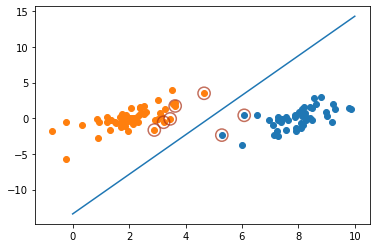

In [10]:
svmMLiA.showSimpleSMO(dataArr,labelArr, alphas, b)

gaussian kernel:  
$$
k(x, y) = \exp (\frac {-||x-y||^2}{2\sigma^2})
$$

In [11]:
supportVectors, labelSV, alphas, svInd, b = svmMLiA.testRbf()

iter: 1 i:99, pairs changed 30
iter: 2 i:99, pairs changed 18
iter: 3 i:99, pairs changed 23
iter: 4 i:99, pairs changed 19
iter: 5 i:99, pairs changed 22
iter: 6 i:99, pairs changed 17
iter: 7 i:99, pairs changed 7
iter: 8 i:99, pairs changed 12
iter: 9 i:99, pairs changed 7
iter: 10 i:99, pairs changed 5
iter: 11 i:99, pairs changed 6
iter: 12 i:99, pairs changed 7
iter: 13 i:99, pairs changed 11
iter: 14 i:99, pairs changed 4
iter: 15 i:99, pairs changed 5
iter: 16 i:90, pairs changed 7
iter: 17 i:94, pairs changed 8
iter: 18 i:90, pairs changed 3
iter: 19 i:90, pairs changed 3
iter: 20 i:90, pairs changed 2
iter: 21 i:90, pairs changed 3
iter: 22 i:90, pairs changed 3
iter: 23 i:90, pairs changed 6
iter: 24 i:90, pairs changed 7
iter: 25 i:87, pairs changed 4
iter: 26 i:87, pairs changed 3
iter: 27 i:87, pairs changed 4
iter: 28 i:87, pairs changed 0
iter: 29 i:99, pairs changed 3
iter: 30 i:87, pairs changed 2
iter: 31 i:87, pairs changed 1
iter: 32 i:87, pairs changed 2
iter: 33 

In [12]:
svmMLiA.testWithFile('testSetRBF.txt', supportVectors, labelSV, alphas, svInd, b)

the training error rate is: 0.000000


In [13]:
svmMLiA.testWithFile('testSetRBF2.txt', supportVectors, labelSV, alphas, svInd, b)

the training error rate is: 0.060000


In [14]:
supportVectors, labelSV, alphas, svInd, b = svmMLiA.testDigits(svmMLiA.gaussianKernel, 10)

iter: 1 i:401, pairs changed 153
iter: 2 i:401, pairs changed 132
iter: 3 i:401, pairs changed 146
iter: 4 i:401, pairs changed 147
iter: 5 i:401, pairs changed 140
iter: 6 i:401, pairs changed 133
iter: 7 i:401, pairs changed 135
iter: 8 i:401, pairs changed 127
iter: 9 i:401, pairs changed 122
iter: 10 i:401, pairs changed 113
iter: 11 i:401, pairs changed 111
iter: 12 i:401, pairs changed 113
iter: 13 i:401, pairs changed 103
iter: 14 i:401, pairs changed 108
iter: 15 i:401, pairs changed 112
iter: 16 i:401, pairs changed 96
iter: 17 i:401, pairs changed 83
iter: 18 i:401, pairs changed 100
iter: 19 i:401, pairs changed 102
iter: 20 i:401, pairs changed 87
iter: 21 i:401, pairs changed 94
iter: 22 i:401, pairs changed 88
iter: 23 i:401, pairs changed 93
iter: 24 i:401, pairs changed 94
iter: 25 i:401, pairs changed 81
iter: 26 i:401, pairs changed 82
iter: 27 i:401, pairs changed 73
iter: 28 i:401, pairs changed 77
iter: 29 i:401, pairs changed 83
iter: 30 i:401, pairs changed 71
it

In [15]:
svmMLiA.testDigitWithFile('trainingDigits', supportVectors, labelSV, alphas, svInd, b)

[[1.05684996]] 1
[[1.01802173]] 1
[[1.24199554]] 1
[[1.00008195]] 1
[[1.14361417]] 1
[[0.99996177]] 1
[[1.1710442]] 1
[[0.99996434]] 1
[[1.062695]] 1
[[1.13727109]] 1
[[0.99999015]] 1
[[1.02910105]] 1
[[1.02910869]] 1
[[0.99996881]] 1
[[0.99995623]] 1
[[0.99999899]] 1
[[1.00001188]] 1
[[1.16051549]] 1
[[0.99992145]] 1
[[1.28066762]] 1
[[1.04918797]] 1
[[1.00003399]] 1
[[1.00007578]] 1
[[1.00000216]] 1
[[1.219981]] 1
[[1.29212885]] 1
[[1.25080562]] 1
[[1.04844615]] 1
[[1.17446737]] 1
[[1.1200503]] 1
[[1.11782332]] 1
[[1.29737114]] 1
[[1.15868316]] 1
[[1.03206683]] 1
[[1.0798976]] 1
[[1.09469996]] 1
[[1.30788785]] 1
[[1.29043988]] 1
[[1.26096509]] 1
[[1.0000857]] 1
[[1.28032562]] 1
[[1.18998713]] 1
[[1.06133789]] 1
[[1.31491679]] 1
[[1.1287045]] 1
[[1.19109024]] 1
[[1.12199914]] 1
[[1.00001769]] 1
[[1.08149184]] 1
[[1.00006302]] 1
[[1.33319491]] 1
[[0.99998731]] 1
[[1.03730844]] 1
[[0.99995855]] 1
[[1.00007076]] 1
[[1.02146309]] 1
[[1.10320429]] 1
[[0.99999078]] 1
[[1.32989092]] 1
[[1.09

In [16]:
svmMLiA.testDigitWithFile('testDigits', supportVectors, labelSV, alphas, svInd, b)

[[1.30318137]] 1
[[1.06613861]] 1
[[1.02328662]] 1
[[0.86553815]] 1
[[0.97019568]] 1
[[0.28839579]] 1
[[1.08586464]] 1
[[0.80910626]] 1
[[0.3794195]] 1
[[1.41310638]] 1
[[0.68532834]] 1
[[1.25094929]] 1
[[1.2111916]] 1
[[1.19442924]] 1
[[1.11820806]] 1
[[1.27060823]] 1
[[1.03397819]] 1
[[0.87435937]] 1
[[0.98461737]] 1
[[0.90054947]] 1
[[1.31750315]] 1
[[0.76364656]] 1
[[1.23721138]] 1
[[1.25602644]] 1
[[0.67776438]] 1
[[0.90174703]] 1
[[0.98818931]] 1
[[1.09763027]] 1
[[1.08693463]] 1
[[1.45096124]] 1
[[0.95283704]] 1
[[1.45518494]] 1
[[0.96391764]] 1
[[0.97506403]] 1
[[1.27515009]] 1
[[1.06678285]] 1
[[1.29486298]] 1
[[1.25604944]] 1
[[1.32137409]] 1
[[0.97335634]] 1
[[1.09498209]] 1
[[1.38556422]] 1
[[0.80347753]] 1
[[0.99491801]] 1
[[0.82254765]] 1
[[1.29766346]] 1
[[1.004345]] 1
[[0.8408749]] 1
[[1.03376911]] 1
[[1.28134919]] 1
[[1.33667051]] 1
[[1.11046375]] 1
[[1.17532724]] 1
[[1.2160186]] 1
[[1.01880755]] 1
[[1.19530267]] 1
[[1.22410564]] 1
[[0.93156887]] 1
[[1.22561039]] 1
[[1